In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
from keras.datasets import reuters

In [40]:
(train_data,train_label),(test_data,test_label)=reuters.load_data(num_words=10000)

In [41]:
len(train_data)

8982

In [42]:
len(test_data)

2246

In [43]:
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

In [44]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [45]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [46]:
train_label[1]

4

In [47]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results    

In [48]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [49]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [50]:
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1
    return results    

In [51]:
one_hot_train_label=to_one_hot(train_label)
one_hot_test_label=to_one_hot(test_label)

In [52]:
one_hot_train_label[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
from keras import models
from keras import layers

In [54]:
model=models.Sequential()
model.add(layers.Dense(128,input_shape=(10000,),activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
history=model.fit(x_train,one_hot_train_label,validation_split=0.3,epochs=10,batch_size=512)

Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 4s 598us/step - loss: 2.5859 - acc: 0.4506 - val_loss: 1.5896 - val_acc: 0.6861
Epoch 2/10
6287/6287 [==============================] - 2s 326us/step - loss: 1.3318 - acc: 0.7102 - val_loss: 1.2417 - val_acc: 0.7406
Epoch 3/10
6287/6287 [==============================] - 2s 326us/step - loss: 0.9902 - acc: 0.7800 - val_loss: 1.1369 - val_acc: 0.7551
Epoch 4/10
6287/6287 [==============================] - 2s 325us/step - loss: 0.7453 - acc: 0.8328 - val_loss: 1.1566 - val_acc: 0.7239
Epoch 5/10
6287/6287 [==============================] - 2s 330us/step - loss: 0.5811 - acc: 0.8743 - val_loss: 1.0317 - val_acc: 0.7781
Epoch 6/10
6287/6287 [==============================] - 2s 337us/step - loss: 0.4302 - acc: 0.9097 - val_loss: 1.0676 - val_acc: 0.7640
Epoch 7/10
6287/6287 [==============================] - 2s 331us/step - loss: 0.3266 - acc: 0.9340 - val_loss: 1.0367 - val_acc: 0.7814


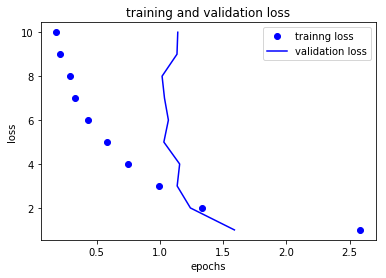

In [57]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,11)
plt.plot(loss,epochs,'bo',label='trainng loss')
plt.plot(val_loss,epochs,'b',label='validation loss')
plt.title("training and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

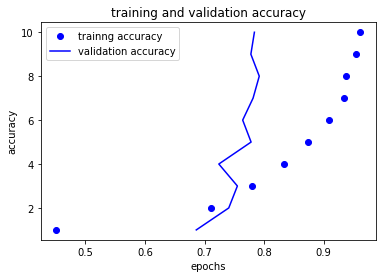

In [58]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,11)
plt.plot(acc,epochs,'bo',label='trainng accuracy')
plt.plot(val_acc,epochs,'b',label='validation accuracy')
plt.title("training and validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [59]:
results=model.evaluate(x_test,one_hot_test_label)

2246/2246 [==============================] - 0s 217us/step


In [60]:
print(results)

[1.1794519781110973, 0.7751558326443496]


In [61]:
prediction=model.predict(x_test)

In [62]:
prediction[0].shape

(46,)

In [63]:
np.sum(prediction[0])

0.9999997

In [64]:
np.argmax(prediction[0])

3